<H2 style="color:aqua">Connection<H2>

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# ===============================
# 1️⃣ CONNECT TO MYSQL & LOAD DATA
# ===============================
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Him@n$hu1",
    database="Adidas"
)

query = """
SELECT
    fs.invoice_date,
    fs.units_sold,
    fs.total_sales,
    fs.operating_profit,
    fs.operating_margin,
    p.product_name,
    l.region,
    l.state,
    sm.method_name
FROM fact_sales fs
JOIN products p ON fs.product_id = p.product_id
JOIN locations l ON fs.location_id = l.location_id
JOIN sales_method sm ON fs.method_id = sm.method_id;
"""

df = pd.read_sql(query, conn)
conn.close()

print("Data Loaded:", df.shape)



Data Loaded: (9648, 9)


C:\Users\vshal\AppData\Local\Temp\ipykernel_9324\1324684239.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


<H3 style="color:aqua">KPIs<H3>

In [2]:
print("\n--- KPI SUMMARY ---")
print("Total Revenue:", round(df['total_sales'].sum(), 2))
print("Total Profit:", round(df['operating_profit'].sum(), 2))
print("Total Units Sold:", df['units_sold'].sum())
print("Average Operating Margin:", round(df['operating_margin'].mean(), 2))


--- KPI SUMMARY ---
Total Revenue: 899902125.0
Total Profit: 332134761.45
Total Units Sold: 2478861
Average Operating Margin: 0.42


<H2 style="color:aqua">visualization<H2>

BASIC DATA PREP

In [4]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['month'] = df['invoice_date'].dt.to_period('M')

SALES BY REGION

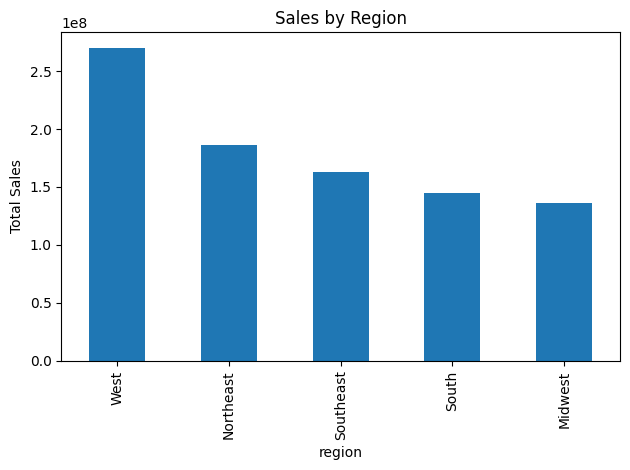

In [5]:
region_sales = (
    df.groupby('region')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
region_sales.plot(kind='bar', title='Sales by Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

 TOP 5 PRODUCTS BY SALES

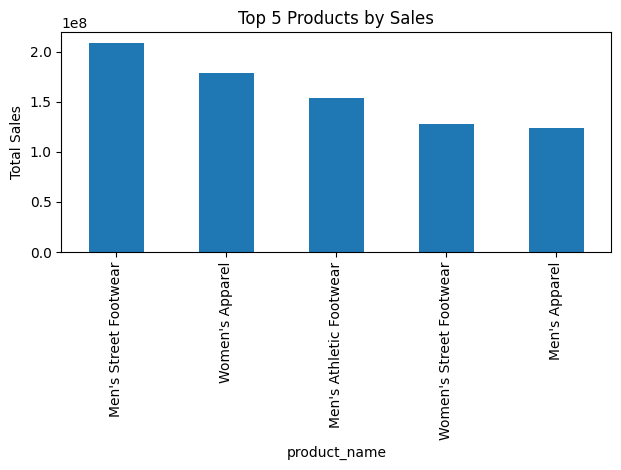

In [8]:
top_products = (
    df.groupby('product_name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
plt.figure()
top_products.plot(kind='bar', title='Top 5 Products by Sales')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

SALES METHOD CONTRIBUTION

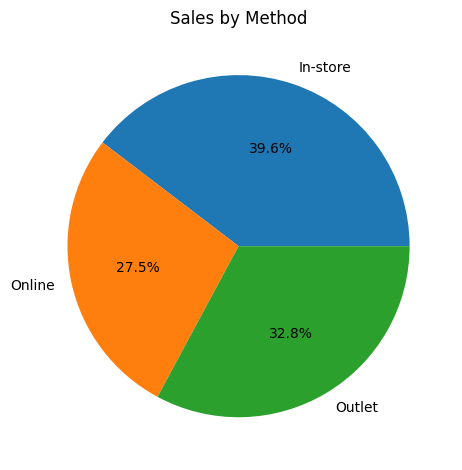

In [9]:
method_sales = df.groupby('method_name')['total_sales'].sum()

plt.figure()
method_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Method')
plt.ylabel('')
plt.tight_layout()
plt.show()

MONTHLY SALES TREND

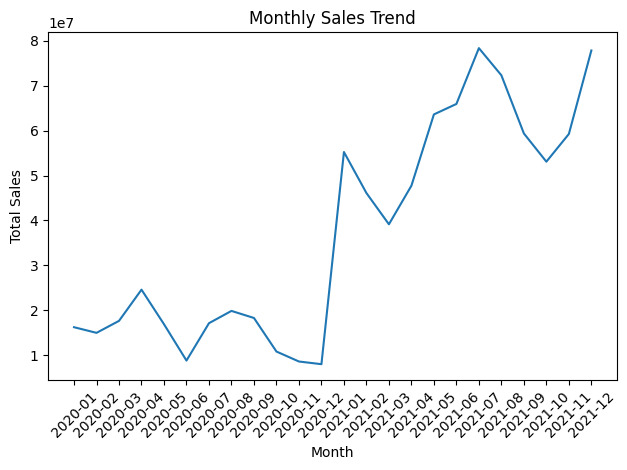

In [10]:
monthly_sales = (
    df.groupby('month')['total_sales']
    .sum()
    .reset_index()
)

monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure()
plt.plot(monthly_sales['month'], monthly_sales['total_sales'])
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

PRODUCT × REGION ANALYSIS (PIVOT)

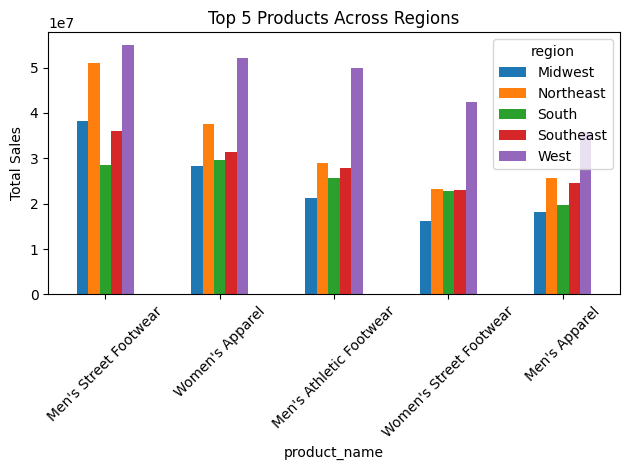

In [11]:
product_region = pd.pivot_table(
    df,
    values='total_sales',
    index='product_name',
    columns='region',
    aggfunc='sum'
)

top_products_list = top_products.index
product_region.loc[top_products_list].plot(kind='bar')
plt.title('Top 5 Products Across Regions')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SALES METHOD TREND OVER TIME

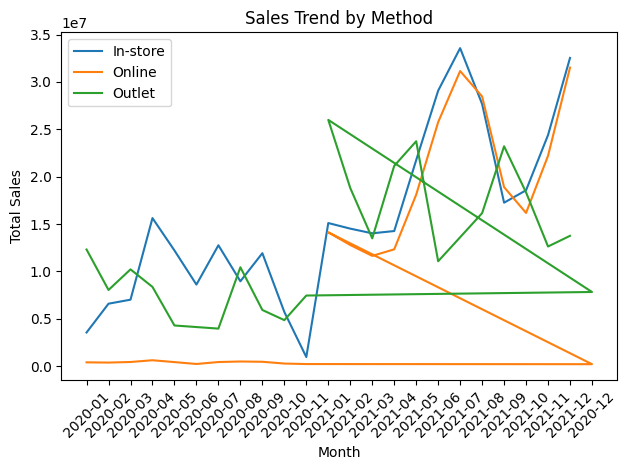

In [12]:
method_monthly = (
    df.groupby(['month', 'method_name'])['total_sales']
    .sum()
    .reset_index()
)

method_monthly['month'] = method_monthly['month'].astype(str)

plt.figure()
for method in method_monthly['method_name'].unique():
    data = method_monthly[method_monthly['method_name'] == method]
    plt.plot(data['month'], data['total_sales'], label=method)

plt.xticks(rotation=45)
plt.title('Sales Trend by Method')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()